In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from itertools import combinations

df = pd.read_csv("data/nyt1.csv")
alpha = 1 - 0.95 ** (1/21)
df['CTR'] = df['Clicks']/df['Impressions']
df = df[df['Impressions'] > 0]

In [37]:
df.head(5)

,Age,Gender,Impressions,Clicks,Signed_In,CTR
0,36,0,3,0,1,0.0
1,73,1,3,0,1,0.0
2,30,0,3,0,1,0.0
3,49,1,3,0,1,0.0
4,47,1,11,0,1,0.0


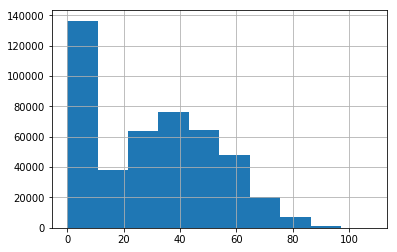

In [23]:
df['Age'].hist()
plt.show()

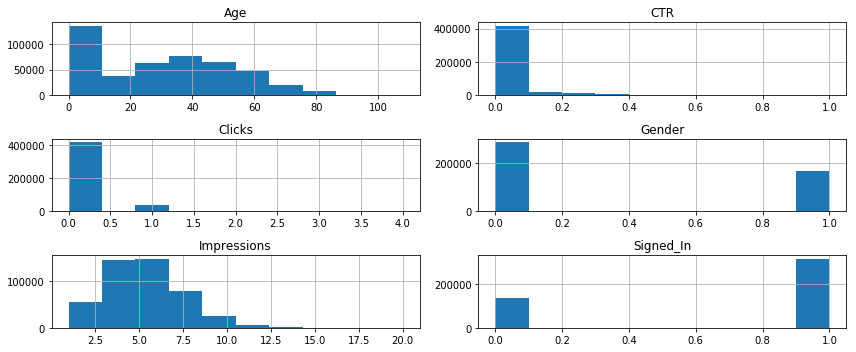

In [31]:
df.hist(figsize = (12,5))
plt.tight_layout()
plt.show()

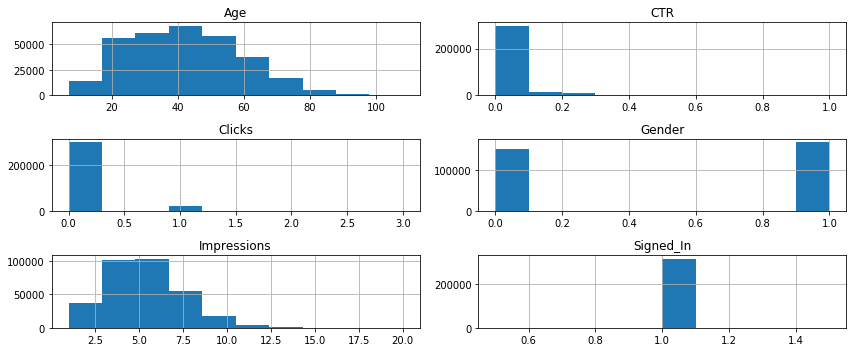

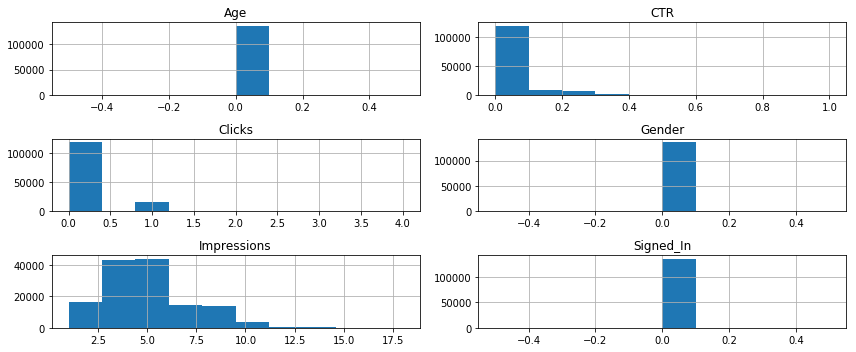

In [33]:
sin = df[df['Signed_In'] == 1]
sout = df[df['Signed_In'] == 0]

sin.hist(figsize = (12,5))
plt.tight_layout()
sout.hist(figsize = (12,5))
plt.tight_layout()
plt.show()

In [40]:
stats.ttest_ind(sin['CTR'],sout['CTR'], equal_var = False)

Ttest_indResult(statistic=-55.376117934260868, pvalue=0.0)

In [41]:
stats.ttest_ind(sin[sin['Gender'] == 1]['CTR'],sin[sin['Gender'] == 0]['CTR'], equal_var = False)

Ttest_indResult(statistic=-3.2897560659351059, pvalue=0.0010028527313147612)

In [45]:
sin['AgeGroup'] = pd.cut(sin['Age'], bins = [7,18,24,34,44,54,64,100], labels = ['7-18','18-24','24-34','34-44','44-54','54-64','64+'])

In [46]:
sin.head(5)

,Age,Gender,Impressions,Clicks,Signed_In,CTR,AgeGroup
0,36,0,3,0,1,0.0,34-44
1,73,1,3,0,1,0.0,64+
2,30,0,3,0,1,0.0,24-34
3,49,1,3,0,1,0.0,44-54
4,47,1,11,0,1,0.0,44-54


In [86]:
ag1, ag2, pv = [], [], []
for (a,b) in combinations({x for x in sin.AgeGroup if x==x},2):
    stat, p = stats.ttest_ind(sin[sin['AgeGroup'] == a]['CTR'],sin[sin['AgeGroup'] == b]['CTR'], equal_var = False)
    ag1.append(a)
    ag2.append(b)
    pv.append(p)
out = pd.DataFrame([ag1,ag2,pv]).T
out.columns = ['ag1','ag2','pv']

In [88]:
out.sort_values(by = 'pv')

,ag1,ag2,pv
3,44-54,64+,2.02788e-295
19,64+,34-44,7.3859e-288
12,24-34,64+,1.09363e-284
8,18-24,64+,3.28567e-272
4,44-54,54-64,2.52527e-151
2,44-54,7-18,4.01438e-151
17,7-18,34-44,4.57515e-146
11,24-34,7-18,7.44927e-146
7,18-24,7-18,6.90098e-144
20,54-64,34-44,7.52323e-144


In [90]:
sin.groupby('AgeGroup').mean()['CTR']

AgeGroup
7-18     0.026585
18-24    0.009720
24-34    0.010146
34-44    0.010286
44-54    0.009958
54-64    0.020307
64+      0.029802
Name: CTR, dtype: float64